# LSTMB 1-star and 5-star only

In this notebook, we will review results of LSTMB network with 16 units.

In order to debug our network and see how much noise we are introducing to the network with middle classes (2, 3, 4). We are going to train the network with only 1-star and 5-star reviews only

All runs use the same 16 unit LSTM architecture with balanced weights and GloVe pre-trained embedding

We will compare our model scores with models that were trained with all 5 star-rating classes.

# Notebooks

* [6.6.1-LSTMB16_15-GloVe-200k-prototype.ipynb](deep_learning/6.6.1-LSTMB16_15-GloVe-200k-prototype.ipynb)
* [6.6.2-LSTMB16_15-GloVe-500k-prototype.ipynb](deep_learning/6.6.2-LSTMB16_15-GloVe-500k-prototype.ipynb)
* [6.6.3-LSTMB16_15-GloVe-1m-prototype.ipynb](deep_learning/6.6.3-LSTMB16_15-GloVe-1m-prototype.ipynb)
* [6.6.4-LSTMB16_15-GloVe-2m-prototype.ipynb](deep_learning/6.6.4-LSTMB16_15-GloVe-2m-prototype.ipynb)

# Results

In [1]:
# import sibling utilities
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import importlib
from datetime import datetime

import util.dict_util as du
import util.report_util as ru
import util.plot_util as pu

logging.basicConfig(level=logging.ERROR)

%matplotlib inline
sns.set(font_scale=2)


REPORT_DIR = "../reports"


/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vinceluk/anaconda3/envs/

In [2]:
import importlib
importlib.reload(ru)

REPORT_LSTM_GLOVE = f'{REPORT_DIR}/glove_embedding-dl_prototype-report.csv'


report_glove = pd.read_csv(REPORT_LSTM_GLOVE, quotechar="'")
report_glove = ru.convert_dnn_report_format(report_glove)
report_glove.train_examples = np.round(report_glove.train_examples).astype(int)

lstm_glove = report_glove[report_glove.model_name == "LSTMB16"]
lstm_glove["eval_metric"] = lstm_glove.classification_report.apply(lambda x: ru.calculate_metric(json.loads(x)))

lstm_glove15 = report_glove[report_glove.model_name == "LSTMB16_15"]
lstm_glove15["eval_metric"] = lstm_glove15.classification_report.apply(lambda x: \
                                                                       ru.calculate_metric15(json.loads(x)))


/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/vinceluk/anaconda3/envs/capstone/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [4]:
lstm_glove15.T

,8,9,10,11
1_f1-score,0.925178,0.917574,0.905409,0.932099
1_precision,0.930437,0.930634,0.919115,0.936589
1_recall,0.919978,0.904875,0.892106,0.927652
1_support,35053,17703,6942,70216
2_f1-score,0.980481,0.978459,0.975885,0.982311
2_precision,0.979038,0.974883,0.972189,0.981086
2_recall,0.981929,0.98206,0.979609,0.983539
2_support,133418,66557,26728,267914
3_f1-score,NaN,NaN,NaN,NaN
3_precision,NaN,NaN,NaN,NaN


# Model Performance

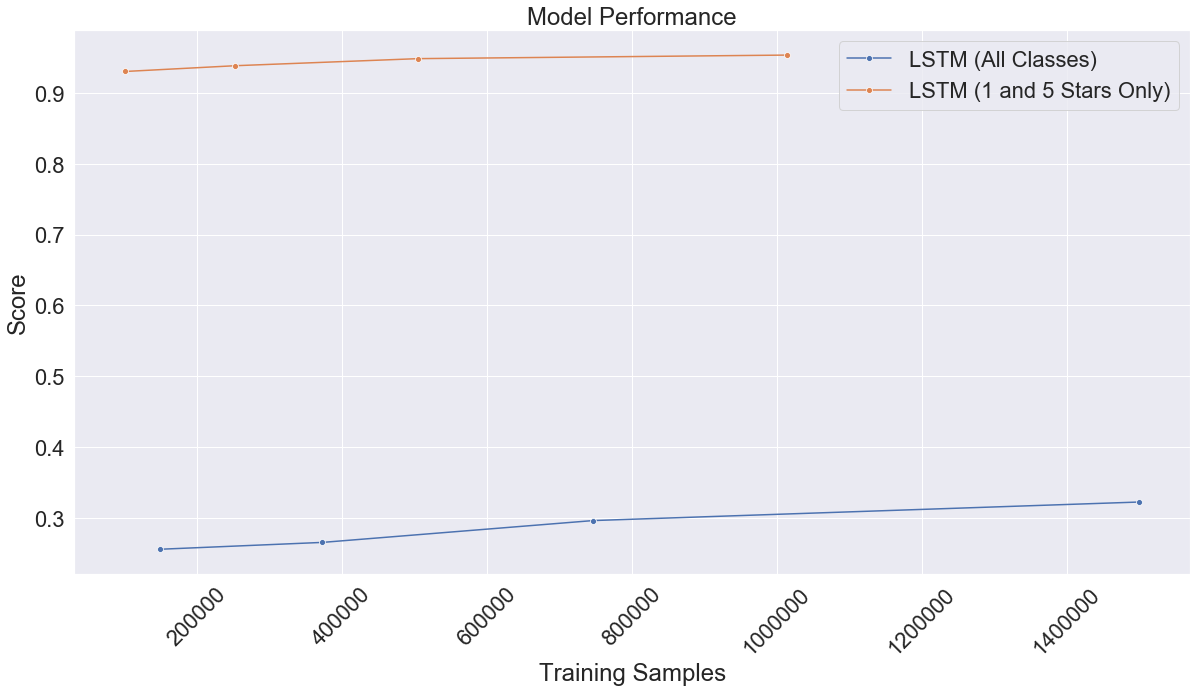

In [3]:
f, a = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(data=lstm_glove, x="train_examples", y="eval_metric", 
             marker="o", label="LSTM (All Classes)")
sns.lineplot(data=lstm_glove15, x="train_examples", y="eval_metric", 
             marker="o", label="LSTM (1 and 5 Stars Only)")
_ = plt.xticks(rotation=45)
_ = plt.xlabel("Training Samples")
_ = plt.ylabel("Score")
_ = plt.title("Model Performance")


